# Análisis de la Base de Datos

### Selección de la Base de Datos

Elegí una base de datos de UC Irvine Machine Learning Repository, https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset, con la cual podremos analizar si un hongo que encontramos en la naturaleza es comestible o no.

In [15]:
import pandas as pd
import numpy as np

data = pd.read_csv('mushrooms.csv', delimiter=';')
df = pd.DataFrame(data)

df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


### Describiendo cada columna del conjunto de datos:
<ol>
<li>class = si el hongo es comestible o no, variable categorica</li>
<li>cap-diameter = diametro de la tapa/sombrero, variable continua</li>
<li>cap-shape = forma de la tapa/sombrero, variable categorica</li>
<li>cap-surface = superficie de la tapa/sombrero, variable categorica</li>
<li>cap-color = color de la tapa/sombrero, variable categorica</li>
<li>does-bruise-or-bleed = ¿tiene moretones o sangra?, variable categorica</li>
<li>gill-attachment = fijacion de las laminas que se encuentran debajo del sombrero, variable categorica</li>
<li>gill-spacing = espacio entre las branquias, variable categorica</li>
<li>gill-color = color de las laminas, variable categorica</li>
<li>stem-height	 = altura del tallo, variable continua</li>
<li>stem-width = ancho del tallo, variable continua</li>
<li>stem-root	 = forma de transición tallo-raiz, variable categorica</li>
<li>stem-surface = superficie del tallo, variable categorica</li>
<li>stem-color = color del tallo, variable categorica</li>
<li>veil-type = tipo de velo, variable categorica</li>
<li>veil-color = color del velo, variable categorica</li>
<li>has-ring = ¿tiene anillo?, variable categorica</li>
<li>ring-type = tipo de anillo, variable categorica</li>
<li>spore-print-color = impresion de esporas en color, variable categorica</li>
<li>habitat = habitat en el que se encontro el hongo, variable categorica</li>
<li>season = estacion del año en la que se encontro el hongo, variable categorica</li>
</ol>

### Normalizando el conjunto de datos

Por una parte, decidí transformar las variables representadas con caracteres a variables numéricas, debido a que de esta forma es más facil analizarlas.
Por otra parte, me di cuenta que lo ideal era tener todos los variables dentro de una misma escala de valores, primero entre 0 y 12 y luego entre 0 y 1.

In [16]:
df_class = {                #COMESTIBLE O NO?
    'p' : 0,    #venenoso
    'e' : 12    #comestible
}

df_cap_shape = {            #FORMA SOMBRERO
    'b': 0,     #campana
    'o': 2,     #otros
    'c': 4,     #conica
    's': 6,     #hundida
    'x': 8,     #convexa
    'f': 10,    #plano
    'p': 12     #esferica
}

df_cap_surface = {          #SUPERFICIE SOMBRERO
    'i': 0,     #fibrosa
    'g': 1.3,   #surcosa
    'y': 2.6,   #escamosa
    's': 3.9,   #liso
    'h': 5.2,   #brillante
    'l': 6.5,   #como cuero
    'k': 7.8,   #sedosa
    't': 9.1,   #pegajosa
    'w': 10.4,  #arrugada
    'e': 11.7,  #carnosa
    '' : 12     #deconocido
}

df_cap_color = {          #COLOR SOMBRERO
    'r': 0,     #verde
    'e': 1.091, #rojo
    'p': 2.182, #rosa
    'o': 3.273, #naranja
    'k': 5.455, #negro
    'y': 6.546, #amarillo
    'w': 7.637, #blanco
    'u': 4.364, #violeta
    'n': 8.728, #marron
    'g': 9.819, #gris
    'l': 10.91, #azul
    'b': 12     #pulido
}

df_does_bruise_bleed = {    #TIENE MORETONES O SANGRA?
    'f': 0,     #falso
    '' : 6,     #desconocido
    't': 12     #verdadero
}

df_gill_attachment = {      #FIJACION DE LAS LAMINAS
    '' : 0,     #desconocido
    'a': 1.71,  #adherida
    'd': 3.43,  #decurrente
    'f': 5.14,  #ninguna
    'x': 6.86,  #anexada
    's': 8.57,  #ondeada
    'e': 10.29, #libre
    'p': 12     #porosa
}

df_gill_spacing = {         #ESPACIADO DE LAS LAMINAS
    'f': 0,     #ninguna
    'c': 4,     #cerca
    '' : 8,     #desconocido
    'd': 12     #distante
}

df_gill_color = {           #COLOR DE LAS LAMINAS
    'e': 0,     #rojo
    'n': 1.091, #marron
    'r': 2.182, #verde
    'k': 3.273, #negro
    'f': 4.364, #ninguno
    'y': 5.455, #amarillo
    'p': 6.546, #rosa
    'o': 7.637, #naranja
    'u': 8.728, #violeta
    'g': 9.819, #gris
    'w': 10.91, #blanco
    'b': 12     #pulido
}

df_stem_root = {            #TRANSICION TALLO-RAIZ
    'b': 0,     #bulboso
    's': 2,     #hinchado
    'c': 4,     #hernia
    'u': 6,     #copa
    'e': 8,     #igual
    'z': 10,    #rizomorfo
    'r': 12     #arraigado
}

df_stem_surface = {         #SUPERFICIE DE LAS LAMINAS
    'g': 0,     #surcosa
    'f': 1.5,   #ninguna
    'h': 3,     #brillante
    'y': 4.5,   #escamosa
    't': 6,     #pegajosa
    'k': 7.5,   #sedosa
    'i': 9,     #fibrosa
    '' : 10.5,  #desconocido
    's': 12     #liso
}

df_stem_color = {           #COLOR DE LAS LAMIANS
    'p': 0,     #rosa
    'r': 1,     #verde
    'k': 2,     #negro
    'e': 3,     #rojo
    'y': 4,     #amarillo
    'u': 5,     #violeta
    'o': 6,     #naranja
    'f': 7,     #ninguno
    'n': 8,     #marron
    'l': 9,     #azul
    'w': 10,    #blanco
    'g': 11,    #gris
    'b': 12     #pulido
}

df_veil_type = {            #TIPO DE VELO
    'u': 0,     #universal
    '' : 6,     #desconocido
    'p': 12     #parcial
}

df_veil_color = {           #COLOR DE VELO
    'k': 0,     #negro
    'n': 1,     #marron
    'r': 2,     #verde
    'l': 3,     #azul
    'u': 4,     #violeta
    'p': 5,     #rosa
    'e': 6,     #rojo
    'o': 7,     #naranja
    'y': 8,     #amarillo
    'b': 9,     #pulido
    'g': 10,    #gris
    'w': 11,    #blanco
    'f': 12     #ninguno
}

df_has_ring = {             #TIENE ANILLO?
    't': 0,     #verdadero
    'f': 12     #falso
}

df_ring_type = {            #TIPO DE ANILLO
    'z': 0,     #faja
    'p': 1.091, #colgante
    'e': 2.182, #evanescente
    'f': 3.273, #ninguno
    'r': 4.364, #resplandeciente
    'c': 5.455, #lleno de telarañas
    's': 6.546, #enfundado
    'y': 7.637, #escamoso
    'g': 8.728, #estriado
    '' : 9.819, #desconocido
    'l': 10.91, #largo
    'm': 12     #movible
}

df_spore_print_color = {    #IMPRESION DE ESPORAS EN COLOR
    'n': 0,     #marron
    'u': 1.71,  #violeta
    'r': 3.43,  #verde
    'k': 5.14,  #negro
    'p': 6.86,  #rosa
    '' : 8.57,  #desconocido
    'w': 10.29, #blanco
    'g': 12     #gris
}

df_habitat= {               #HABITAT
    'p': 0,     #camino
    'g': 1.71,  #pasto
    'h': 3.43,  #brezales
    'd': 5.14,  #madera
    'm': 6.86,  #prado
    'l': 8.57,  #hojas
    'u': 10.29, #urbano
    'w': 12     #residuos
}

df_season= {                #ESTACION
    'a': 0,     #otoño
    'u': 4,     #verano
    'w': 8,     #invierno
    's': 12     #primavera
}

df_cap_diameter = {         #DIAMETRO SOMBRERO
    (0, 5.195):        0,
    (5.196, 10.390):   1,
    (10.391, 15.585):  2,
    (15.586, 20.780):  3,
    (20.781, 25.975):  4,
    (25.976, 31.170):  5,
    (31.171, 36.395):  6,
    (36.396, 41.560):  7,
    (41.561, 46.755):  8,
    (46.756, 51.950):  10,
    (51.951, 57.145):  11,
    (57.146, 62.340):  12
}

df_stem_height= {           #ALTURA DE LAS LAMINAS
    (0, 2.827):        0,
    (2.828, 5.653):    1,
    (5.654, 8.480):    2,
    (8.481, 11.306):   3,
    (11.307,14.133):   4,
    (14.134, 16.959):  5,
    (16.960, 19.786):  6,
    (19.787, 22.612):  7,
    (22.613, 25.439):  8,
    (25.440, 28.265):  10,
    (28.266, 31.092):  11,
    (31.093, 33.920):  12
}

df_stem_width= {            #ANCHO DE LAS LAMINAS
    (0, 8.6592):         0,
    (8.6593, 17.3183):   1,
    (17.3184, 25.9775):  2,
    (25.9776, 34.6366):  3,
    (34.6367, 43.2958):  4,
    (43.2959, 51.9549):  5,
    (51.9550, 60.6141):  6,
    (60.6142, 69.2732):  7,
    (69.2733, 77.9324):  8,
    (77.9325, 86.5915):  10,
    (86.5916, 95.2507):  11,
    (95.2508, 103.9100): 12
}

Reemplazo los valores e imprimo el DataFrame actualizado

In [17]:
reemplazo = {
    'class': df_class,
    'cap-shape':  df_cap_shape,
    'cap-surface': df_cap_surface,
    'cap-color': df_cap_color,
    'does-bruise-or-bleed': df_does_bruise_bleed,
    'gill-attachment': df_gill_attachment,
    'gill-spacing': df_gill_spacing,
    'gill-color': df_gill_color,
    'stem-root': df_stem_root,
    'stem-surface': df_stem_surface,
    'stem-color':  df_stem_color,
    'veil-type':  df_veil_type,
    'veil-color': df_veil_color,
    'has-ring':  df_has_ring,
    'ring-type': df_ring_type,
    'spore-print-color': df_spore_print_color,
    'habitat':  df_habitat,
    'season': df_season 
}

def reemplazo_variables(valores, rango):
    for rango_dic, grupo in rango.items():
        if rango_dic[0] <= valores <= rango_dic[1]:
            return grupo
    return -1

df['cap-diameter'] = df['cap-diameter'].apply(lambda x: reemplazo_variables(x, df_cap_diameter))
df['stem-height'] = df['stem-height'].apply(lambda x: reemplazo_variables(x, df_stem_height))
df['stem-width'] = df['stem-width'].apply(lambda x: reemplazo_variables(x, df_stem_width))

for col, rep in reemplazo.items():
    if col in df.columns:
        df[col] = df[col].replace(rep)
    
df

C:\Users\Micaela\AppData\Local\Temp\ipykernel_20116\3413692244.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(rep)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,2,8,1.3,3.273,0,10.29,NaN,10.910,5,...,2,4.5,10,0.0,11.0,0,8.728,NaN,5.14,8
1,0,3,8,1.3,3.273,0,10.29,NaN,10.910,6,...,2,4.5,10,0.0,11.0,0,8.728,NaN,5.14,4
2,0,2,8,1.3,3.273,0,10.29,NaN,10.910,6,...,2,4.5,10,0.0,11.0,0,8.728,NaN,5.14,8
3,0,2,10,5.2,1.091,0,10.29,NaN,10.910,5,...,2,4.5,10,0.0,11.0,0,1.091,NaN,5.14,8
4,0,2,8,5.2,3.273,0,10.29,NaN,10.910,5,...,2,4.5,10,0.0,11.0,0,1.091,NaN,5.14,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,0,6,3.9,6.546,0,5.14,0.0,4.364,1,...,NaN,NaN,4,NaN,NaN,12,3.273,NaN,5.14,0
61065,0,0,10,3.9,6.546,0,5.14,0.0,4.364,1,...,NaN,NaN,4,NaN,NaN,12,3.273,NaN,5.14,0
61066,0,0,6,3.9,6.546,0,5.14,0.0,4.364,1,...,NaN,NaN,4,NaN,NaN,12,3.273,NaN,5.14,4
61067,0,0,10,3.9,6.546,0,5.14,0.0,4.364,1,...,NaN,NaN,4,NaN,NaN,12,3.273,NaN,5.14,4


Reemplazo los valores de las columnas con NaN

In [18]:
values = {"gill-attachment": 0,"veil-type": 7, "stem-surface": 7, "cap-surface": 0, "does-bruise-or-bleed": 5, "gill-spacing": 6, "ring-type":9,"spore-print-color":5}
df =df.fillna(value=values)

df = df.drop(columns=['cap-surface', 'stem-root']) #Elimino las columnas porque no me deja imprimir 
df = df.divide(12)

df

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0.0,0.166667,0.666667,0.272750,0.0,0.857500,0.5,0.909167,0.416667,0.083333,0.375000,0.833333,0.000000,0.916667,0.0,0.727333,0.416667,0.428333,0.666667
1,0.0,0.250000,0.666667,0.272750,0.0,0.857500,0.5,0.909167,0.500000,0.166667,0.375000,0.833333,0.000000,0.916667,0.0,0.727333,0.416667,0.428333,0.333333
2,0.0,0.166667,0.666667,0.272750,0.0,0.857500,0.5,0.909167,0.500000,0.166667,0.375000,0.833333,0.000000,0.916667,0.0,0.727333,0.416667,0.428333,0.666667
3,0.0,0.166667,0.833333,0.090917,0.0,0.857500,0.5,0.909167,0.416667,0.083333,0.375000,0.833333,0.000000,0.916667,0.0,0.090917,0.416667,0.428333,0.666667
4,0.0,0.166667,0.666667,0.272750,0.0,0.857500,0.5,0.909167,0.416667,0.083333,0.375000,0.833333,0.000000,0.916667,0.0,0.090917,0.416667,0.428333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0.0,0.000000,0.500000,0.545500,0.0,0.428333,0.0,0.363667,0.083333,0.000000,0.583333,0.333333,0.583333,NaN,1.0,0.272750,0.416667,0.428333,0.000000
61065,0.0,0.000000,0.833333,0.545500,0.0,0.428333,0.0,0.363667,0.083333,0.000000,0.583333,0.333333,0.583333,NaN,1.0,0.272750,0.416667,0.428333,0.000000
61066,0.0,0.000000,0.500000,0.545500,0.0,0.428333,0.0,0.363667,0.083333,0.000000,0.583333,0.333333,0.583333,NaN,1.0,0.272750,0.416667,0.428333,0.333333
61067,0.0,0.000000,0.833333,0.545500,0.0,0.428333,0.0,0.363667,0.083333,0.000000,0.583333,0.333333,0.583333,NaN,1.0,0.272750,0.416667,0.428333,0.333333


### Análisis de Correlaciones:


**Calculando Matriz Correlación**

La misma nos muestra la correlación entre todas las variables numéricas de tu conjunto de datos. Un valor cercano a 1 indica una fuerte correlación positiva, un valor cercano a -1 indica una fuerte correlación negativa, y un valor cercano a 0 indica una baja correlación.

In [19]:
df_stats = df.describe().T                          # Estadisticas descriptivas del DataFrame traspuestas para facilitar la normalización
df_n = (df - df_stats['mean']) / df_stats['std']    # Normalizo el Data Frame, a cada valor le resto la media y lo divido por la desviación estándar
df_n.describe()

df_n.corr()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
class,1.000000,0.171592,0.180186,0.234617,0.019889,0.199589,0.107190,0.182936,0.114401,0.196259,0.199410,0.235295,0.052677,0.339433,0.057559,0.152631,0.127169,0.166170,0.088445
cap-diameter,0.171592,1.000000,0.109947,-0.003012,0.172994,0.323842,0.044362,0.087594,0.374196,0.638695,0.001100,0.027054,-0.082287,0.112367,-0.057616,0.131434,0.044257,0.117337,0.056138
cap-shape,0.180186,0.109947,1.000000,-0.032422,0.059482,0.205439,0.158788,0.100004,0.184356,0.133522,0.099058,-0.016841,0.005281,-0.103018,-0.036800,0.041431,0.066556,0.131941,-0.101134
cap-color,0.234617,-0.003012,-0.032422,1.000000,-0.062094,0.065166,0.026272,0.060382,0.026601,0.053590,0.116330,0.266865,0.036567,-0.213543,-0.014603,0.084947,0.064043,0.022427,0.056055
does-bruise-or-bleed,0.019889,0.172994,0.059482,-0.062094,1.000000,0.157100,-0.001115,-0.028811,0.069007,0.167987,-0.055949,-0.009960,0.038548,-0.049337,-0.019195,0.086251,-0.034266,0.026595,-0.103325
gill-attachment,0.199589,0.323842,0.205439,0.065166,0.157100,1.000000,-0.030788,-0.005954,0.193936,0.358039,-0.039031,-0.027848,-0.110844,0.060747,-0.040525,0.003488,0.071854,0.148102,-0.043590
gill-spacing,0.107190,0.044362,0.158788,0.026272,-0.001115,-0.030788,1.000000,0.127342,0.051840,-0.066270,0.248879,0.102164,0.022489,0.158718,0.099011,0.088046,0.065365,-0.090771,-0.035367
gill-color,0.182936,0.087594,0.100004,0.060382,-0.028811,-0.005954,0.127342,1.000000,0.113758,0.081692,0.067623,0.218346,-0.209686,0.425322,0.012937,0.063993,0.031174,0.036978,-0.035379
stem-height,0.114401,0.374196,0.184356,0.026601,0.069007,0.193936,0.051840,0.113758,1.000000,0.399397,0.027557,0.125464,-0.285215,0.182905,-0.265256,0.263741,0.026979,0.057441,-0.038792
stem-width,0.196259,0.638695,0.133522,0.053590,0.167987,0.358039,-0.066270,0.081692,0.399397,1.000000,-0.083331,0.069647,-0.023492,0.115792,0.013889,0.034503,0.172169,0.141539,0.021901


**Analizando la Matriz Correlación**

Con la representación visual de la matriz podemos identificar y analizar rápidamente las correlaciones más fuertes utilizando un mapa de calor (heatmap).

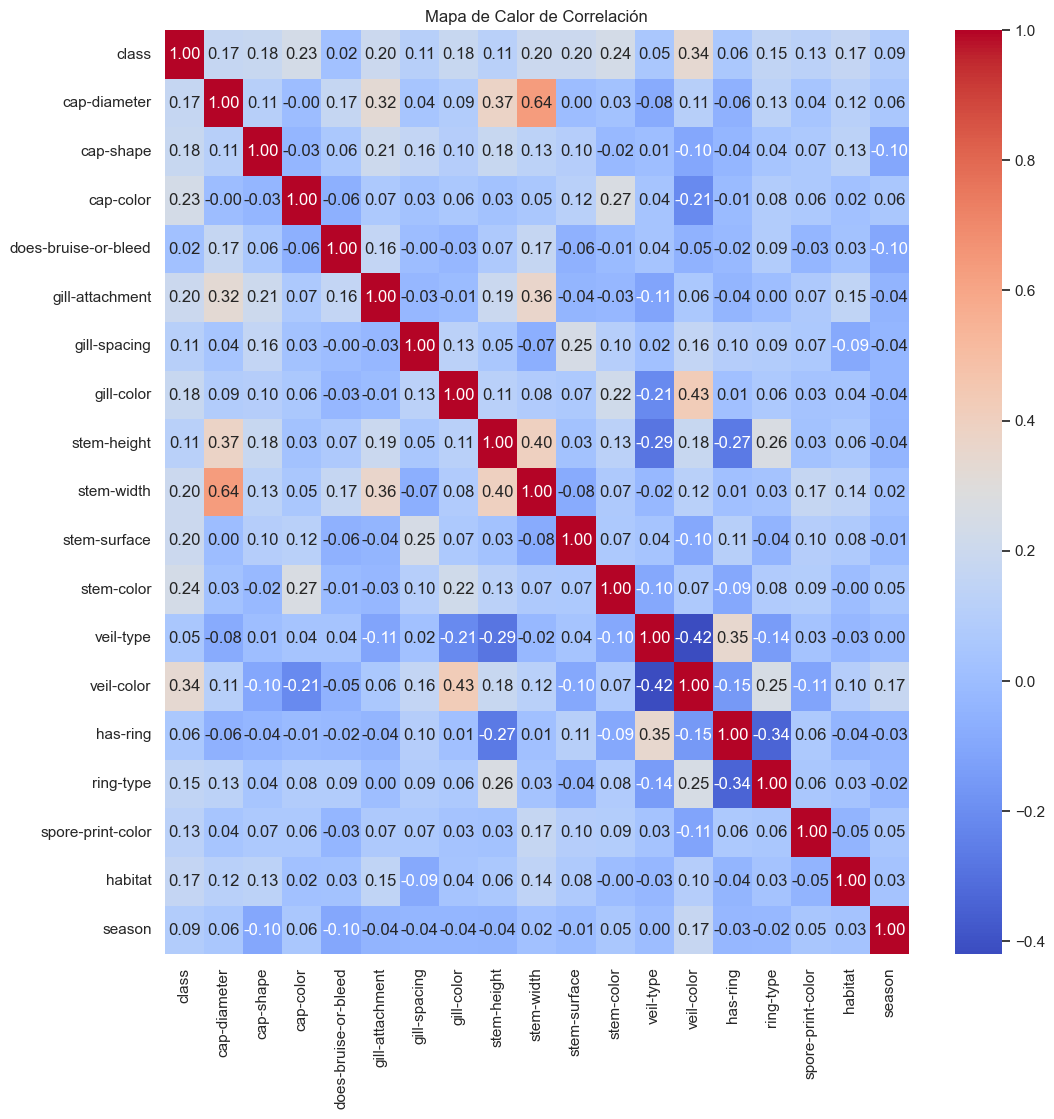

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_correlacion = df.corr() # Calculo la matriz de correlación

sns.set(style="whitegrid") # Configuro el estilo de seaborn

plt.figure(figsize=(12, 12)) # Configurar el diseño del gráfico

sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm') # Creo el mapa de calor de correlación con los valores numéricos

plt.title('Mapa de Calor de Correlación') # Añado el título

plt.show()# Mostrar el gráfico

1. **'does-bruise-or-bleed'** y **'has-ring'** no considero que tengan gran impacto a la hora de la determinar si un hongo es comestible o no, por ende no las tendre en cuenta.

2. **'gill-spacing'** y **'veil-type'** tampoco tienen demasiada relacion y tienen muchas filas vacias por ende tampoco las tendre en cuenta.

3. **'veil-color'** es la variable que mas aporta pero debido a que tiene muchos registros vacios, no me queda otra que eliminarla ya que al eliminar los datos atipicos, me hace eliminar casi todo el data frame. Algo similar pasa con **stem-surface**

4. Tanto **'gill-color'**, **'stem-color'** y **'cap-color'**, son las columnas que mas aportan para determinar si un hongo es comestible o no, de mas esta decir que el resto tambien aporta su granito de arena.

In [21]:
df = df.drop(columns=['does-bruise-or-bleed', 'gill-spacing', 'veil-type', 'has-ring', 'veil-color', 'spore-print-color', 'stem-surface'])

df

,class,cap-diameter,cap-shape,cap-color,gill-attachment,gill-color,stem-height,stem-width,stem-color,ring-type,habitat,season
0,0.0,0.166667,0.666667,0.272750,0.857500,0.909167,0.416667,0.083333,0.833333,0.727333,0.428333,0.666667
1,0.0,0.250000,0.666667,0.272750,0.857500,0.909167,0.500000,0.166667,0.833333,0.727333,0.428333,0.333333
2,0.0,0.166667,0.666667,0.272750,0.857500,0.909167,0.500000,0.166667,0.833333,0.727333,0.428333,0.666667
3,0.0,0.166667,0.833333,0.090917,0.857500,0.909167,0.416667,0.083333,0.833333,0.090917,0.428333,0.666667
4,0.0,0.166667,0.666667,0.272750,0.857500,0.909167,0.416667,0.083333,0.833333,0.090917,0.428333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0.0,0.000000,0.500000,0.545500,0.428333,0.363667,0.083333,0.000000,0.333333,0.272750,0.428333,0.000000
61065,0.0,0.000000,0.833333,0.545500,0.428333,0.363667,0.083333,0.000000,0.333333,0.272750,0.428333,0.000000
61066,0.0,0.000000,0.500000,0.545500,0.428333,0.363667,0.083333,0.000000,0.333333,0.272750,0.428333,0.333333
61067,0.0,0.000000,0.833333,0.545500,0.428333,0.363667,0.083333,0.000000,0.333333,0.272750,0.428333,0.333333


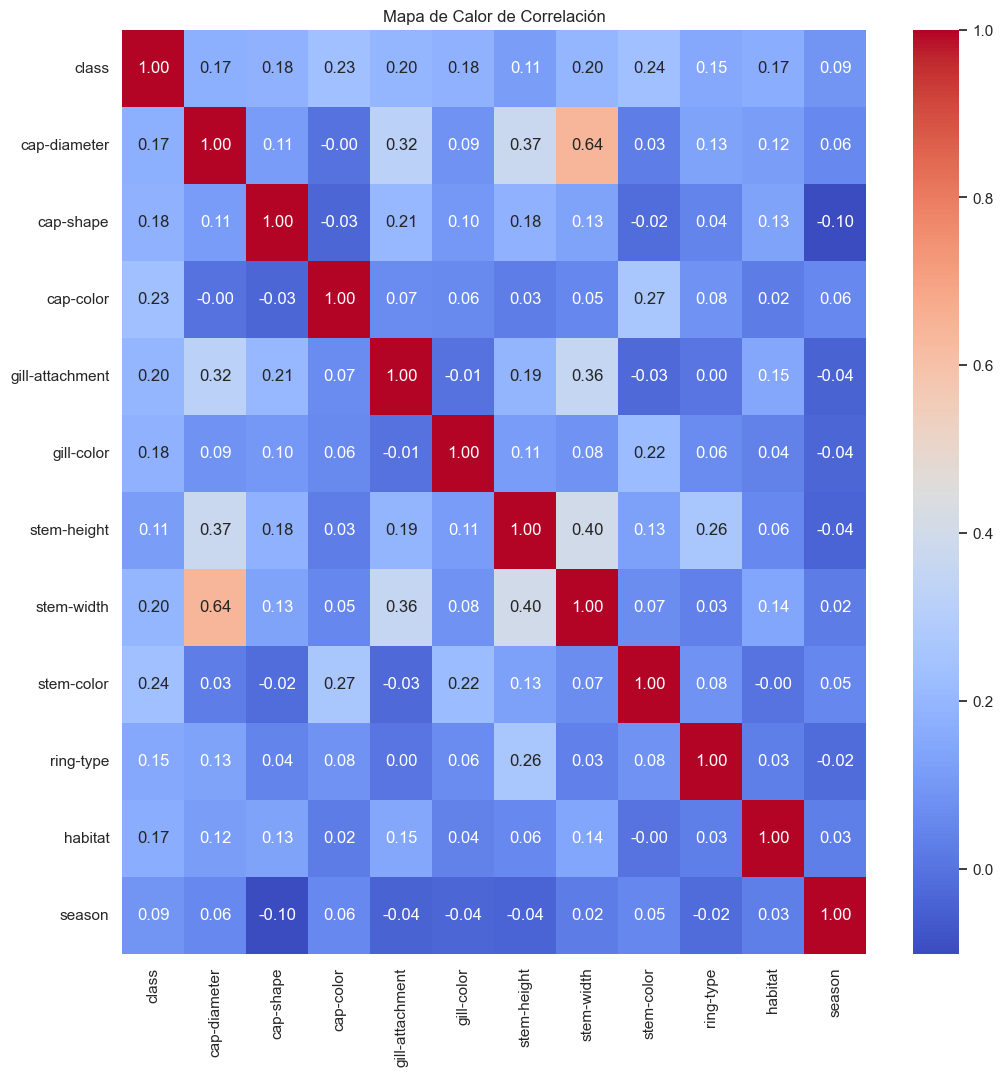

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_correlacion = df.corr() # Calculo la matriz de correlación

sns.set(style="whitegrid") # Configuro el estilo de seaborn

plt.figure(figsize=(12, 12)) # Configurar el diseño del gráfico

sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm') # Creo el mapa de calor de correlación con los valores numéricos

plt.title('Mapa de Calor de Correlación') # Añado el título

plt.show()# Mostrar el gráfico

### Análisis de Factibilidad:

**¿Es esta base de datos adecuada para entrenar una red neuronal de clasificación?**

La base de datos cuenta con un tamaño suficiente de aproximadamente 61000 registros(luego de limpiar los datos atipicos queda de 22000 valores aprox) y considero que esta cantidad es mas que suficiente para el analisis y modelizacion de una red neuronal. Las características seleccionadas como entradas son relevantes para la clasificación. Considero que esta base de datos es ideal para entrenar una red neuronal de clasificación y obtener resultados precisos.

El **proposito** de entrenar esta red neuronal sera predecir si un hongo encontrado en la naturaleza es comestible o no, segun determinadas caracteristicas como pueden ser el color, el tamaño, la forma, etc.


### Deteccion de Valores Atípicos y Mediana




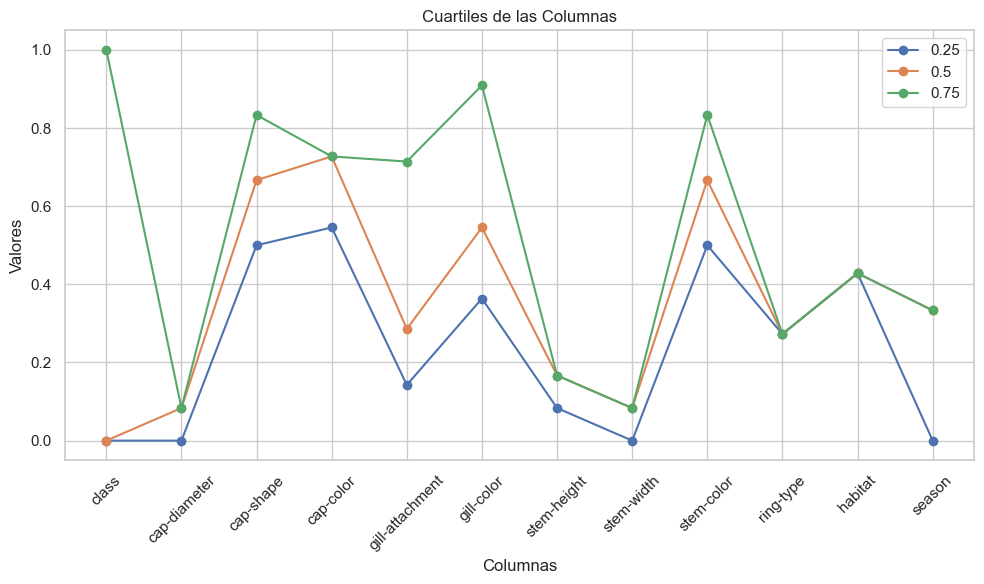

In [23]:
import matplotlib.pyplot as plt

# Obtener nombres de todas las columnas excepto la última
columnas = df.columns

# Configurar el diseño del gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Calcular los cuartiles para cada columna
quartiles = df.quantile([ 0.25, 0.5, 0.75])

# Transponer los datos para que cada fila represente un cuartil
quartiles = quartiles.T

# Graficar los cuartiles
for q in quartiles.columns:
    ax.plot(columnas, quartiles[q], marker='o', label=q)

# Añadir las etiquetas de los ejes y el título
ax.set_xlabel('Columnas')
ax.set_ylabel('Valores')
ax.set_title('Cuartiles de las Columnas')
ax.legend()

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'class'}>,
        <Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'cap-shape'}>],
       [<Axes: title={'center': 'cap-color'}>,
        <Axes: title={'center': 'gill-attachment'}>,
        <Axes: title={'center': 'gill-color'}>],
       [<Axes: title={'center': 'stem-height'}>,
        <Axes: title={'center': 'stem-width'}>,
        <Axes: title={'center': 'stem-color'}>],
       [<Axes: title={'center': 'ring-type'}>,
        <Axes: title={'center': 'habitat'}>,
        <Axes: title={'center': 'season'}>]], dtype=object)

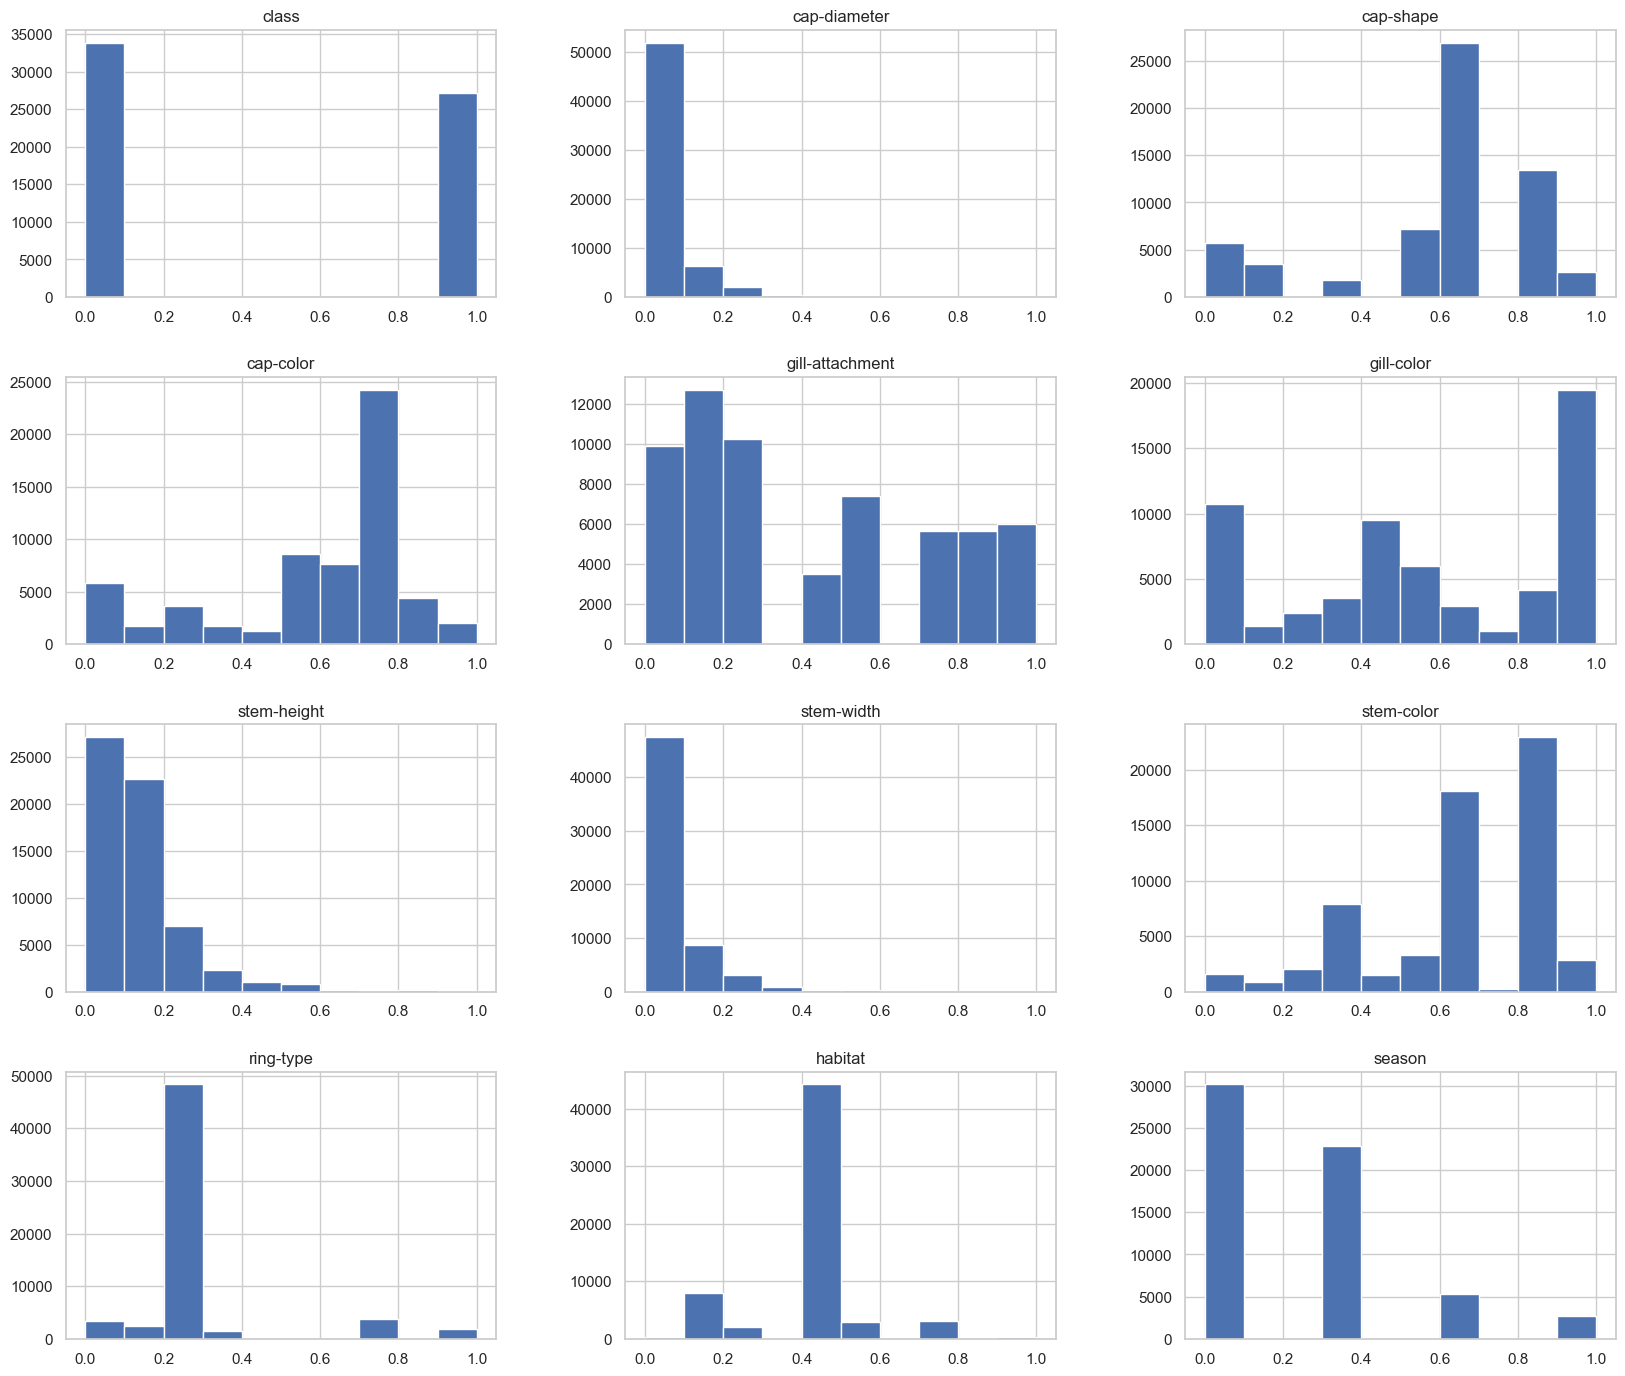

In [24]:
df.hist(figsize=(20, 17))

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos utilizando el criterio del IQR
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Contar el número de valores atípicos por fila
num_outliers = outliers.sum()
print("Filas con Valores Atípicos:\n", num_outliers)

# Saco del df las filas con valores atípicos (y reinserto la columna de salida original)
df = df.where(np.invert(outliers))


Filas con Valores Atípicos:
 class                  0
cap-diameter        2729
cap-shape              0
cap-color          11176
gill-attachment        0
gill-color             0
stem-height         4391
stem-width          4830
stem-color             0
ring-type          12708
habitat            16860
season              2727
dtype: int64


#### Analizando los dos graticos considero tener datos atípicos en mi Base de Datos, por ende pasaremos a eliminarlos

In [26]:

# Función para eliminar outliers usando la regla de las 3 desviaciones estándar
def remove_outliers(col):
    z_scores = np.abs((col - col.mean()) / col.std())
    threshold = 3
    return col[z_scores < threshold]

# Aplicar la función a cada columna y crear un nuevo DataFrame
df_limpia = df.apply(remove_outliers)

df_limpia = df_limpia.dropna(how='any')

df_limpia

,class,cap-diameter,cap-shape,cap-color,gill-attachment,gill-color,stem-height,stem-width,stem-color,ring-type,habitat,season
2472,1.0,0.000000,0.333333,0.727333,0.857500,0.909167,0.250000,0.083333,0.833333,0.27275,0.428333,0.000000
2481,1.0,0.000000,0.333333,0.727333,0.857500,0.909167,0.250000,0.083333,0.666667,0.27275,0.428333,0.333333
2485,1.0,0.083333,0.333333,0.727333,0.857500,0.909167,0.250000,0.083333,0.666667,0.27275,0.428333,0.000000
2495,1.0,0.083333,0.333333,0.727333,0.857500,0.909167,0.250000,0.083333,0.666667,0.27275,0.428333,0.333333
2506,1.0,0.083333,0.333333,0.727333,0.857500,0.909167,0.250000,0.083333,0.666667,0.27275,0.428333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0.0,0.000000,0.500000,0.545500,0.428333,0.363667,0.083333,0.000000,0.333333,0.27275,0.428333,0.000000
61065,0.0,0.000000,0.833333,0.545500,0.428333,0.363667,0.083333,0.000000,0.333333,0.27275,0.428333,0.000000
61066,0.0,0.000000,0.500000,0.545500,0.428333,0.363667,0.083333,0.000000,0.333333,0.27275,0.428333,0.333333
61067,0.0,0.000000,0.833333,0.545500,0.428333,0.363667,0.083333,0.000000,0.333333,0.27275,0.428333,0.333333


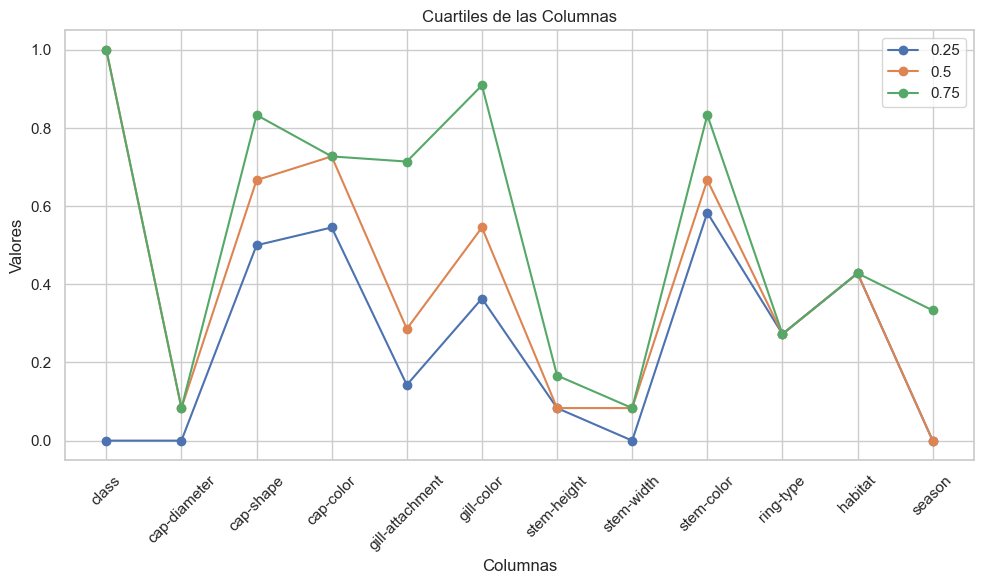

In [27]:
import matplotlib.pyplot as plt

# Obtener nombres de todas las columnas excepto la última
columnas = df_limpia.columns

# Configurar el diseño del gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Calcular los cuartiles para cada columna
quartiles = df_limpia.quantile([ 0.25, 0.5, 0.75])

# Transponer los datos para que cada fila represente un cuartil
quartiles = quartiles.T

# Graficar los cuartiles
for q in quartiles.columns:
    ax.plot(columnas, quartiles[q], marker='o', label=q)

# Añadir las etiquetas de los ejes y el título
ax.set_xlabel('Columnas')
ax.set_ylabel('Valores')
ax.set_title('Cuartiles de las Columnas')
ax.legend()

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Luego de limpiar loss datos atípicos de mi Data Frame los guardamos en otro archivo para luego realiar la Red Neuronal.

In [28]:
df_limpia.to_csv("mushrooms_limpios.csv", index=False)